In [1]:
import sqlite3
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
connection = sqlite3.connect('C:/Users/kouadio/Database.db')

In [2]:
cursor = connection.cursor()

In [3]:
x=cursor.execute("SELECT * FROM sqlite_master where type='table'")


In [4]:
select = "SELECT * FROM orders"
cursor.execute(select)

## Customers

In [5]:
query2 ="""
    SELECT orders.customer_id, ROUND(SUM(items.price + items.freight_value),2) AS sales
    FROM orders
    INNER JOIN items 
    ON items.order_id = orders.order_id
    GROUP BY customer_id
    """

In [6]:
cursor.execute(query2)
result2 = cursor.fetchall()

In [7]:
result2[:100]

[('00012a2ce6f8dcda20d059ce98491703', 114.74),
 ('000161a058600d5901f007fab4c27140', 67.41),
 ('0001fd6190edaaf884bcaf3d49edf079', 195.42),
 ('0002414f95344307404f0ace7a26f1d5', 179.35),
 ('000379cdec625522490c315e70c7a9fb', 107.01),
 ('0004164d20a9e969af783496f3408652', 71.8),
 ('000419c5494106c306a97b5635748086', 49.4),
 ('00046a560d407e99b969756e0b10f282', 166.59),
 ('00050bf6e01e69d5c0fd612f1bcfb69c', 85.23),
 ('000598caf2ef4117407665ac33275130', 1255.71),
 ('0005aefbb696d34b3424dccd0a0e9fd0', 147.33),
 ('00062b33cb9f6fe976afdcff967ea74d', 58.95),
 ('00066ccbe787a588c52bd5ff404590e3', 270.0),
 ('00072d033fe2e59061ae5c3aff1a2be5', 106.97),
 ('0009a69b72033b2d0ec8c69fc70ef768', 173.6),
 ('000bf8121c3412d3057d32371c5d3395', 45.56),
 ('000e943451fc2788ca6ac98a682f2f49', 106.23),
 ('000f17e290c26b28549908a04cfe36c1', 139.52),
 ('000fd45d6fedae68fc6676036610f879', 66.81),
 ('0010068a73b7c56da5758c3f9e5c7375', 54.83),
 ('001028b78fd413e19704b3867c369d3a', 37.61),
 ('00104a47c29da701ce41ee

In [8]:
query2_10 = (
    """SELECT orders.customer_id, ROUND(SUM(items.price + items.freight_value),2) AS sales
    FROM orders
    INNER JOIN items 
    ON items.order_id = orders.order_id
    GROUP BY customer_id
    ORDER BY sales DESC
    LIMIT 10 """)

In [9]:
cursor.execute(query2)

In [10]:
result2_10 = pd.read_sql(query2_10, connection)
result2_10

,customer_id,sales
0,1617b1357756262bfa56ab541c47bc16,13664.08
1,ec5b2ba62e574342386871631fafd3fc,7274.88
2,c6e2731c5b391845f6800c97401a43a9,6929.31
3,f48d464a0baaea338cb25f816991ab1f,6922.21
4,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66
5,05455dfa7cd02f13d132aa7a6a9729c6,6081.54
6,df55c14d1476a9a3467f131269c2477f,4950.34
7,e0a2412720e9ea4f26c1ac985f6a7358,4809.44
8,24bbf5fd2f2e1b359ee7de94defc4a15,4764.34
9,3d979689f636322c62418b6346b1c6d2,4681.78


In [11]:
type(result2_10)

pandas.core.frame.DataFrame

In [12]:
len(result2_10)

10

Text(0, 0.5, 'customer_id')

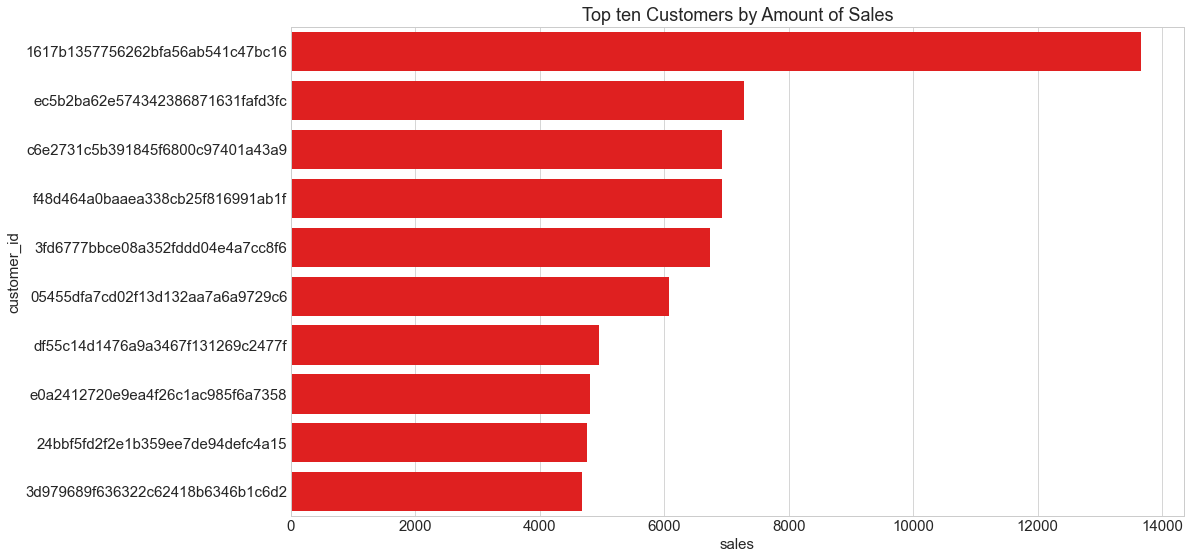

In [13]:
fig=plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 15})
plt.style.use('seaborn-whitegrid')
sns.barplot(data = result2_10, x = "sales", y = "customer_id", color = "#FF0000")
plt.title('Top ten Customers by Amount of Sales')
plt.xlabel('sales')
plt.ylabel('customer_id')

In [14]:
query3_10 = (
    """SELECT orders.customer_id, SUM(order_item_id) AS order_nb
    FROM orders
    INNER JOIN items 
    ON items.order_id = orders.order_id
    GROUP BY customer_id
    ORDER BY order_nb DESC
    LIMIT 10"""
    )

In [15]:
result3_10 = pd.read_sql(query3_10, connection)
result3_10

,customer_id,order_nb
0,fc3d1daec319d62d49bfb5e1f83123e9,231
1,be1b70680b9f9694d8c70f41fa3dc92b,210
2,bd5d39761aa56689a265d95d8d32b8be,210
3,adb32467ecc74b53576d9d13a5a55891,120
4,10de381f8a8d23fff822753305f71cae,120
5,d5f2b3f597c7ccafbb5cac0bcc3d6024,105
6,a7693fba2ff9583c78751f2b66ecab9d,105
7,7d321bd4e8ba1caf74c4c1aabd9ae524,91
8,daf15f1b940cc6a72ba558f093dc00dd,78
9,9eb3d566e87289dcb0acf28e1407c839,78


Text(0, 0.5, 'customer_id')

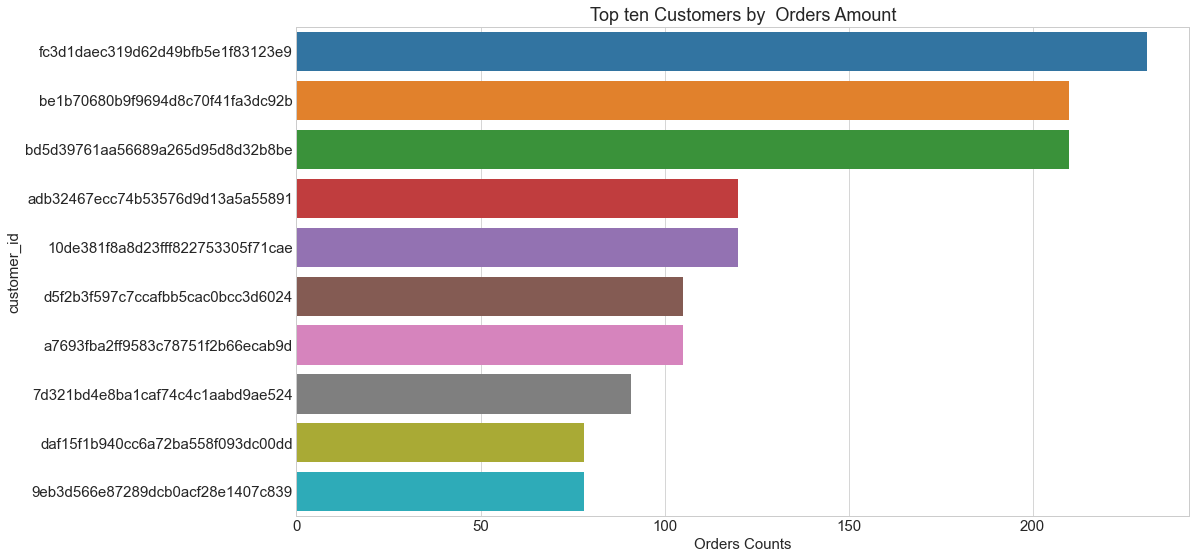

In [16]:
fig=plt.figure(figsize=(16,9))
sns.barplot(data = result3_10, y="customer_id", x="order_nb")
plt.title('Top ten Customers by  Orders Amount')
plt.xlabel('Orders Counts')
plt.ylabel('customer_id')

In [17]:
query4_10 = (
    """SELECT customer_state,  COUNT(customer_id) AS nb_customer
    FROM customer 
    GROUP BY customer_state
    ORDER BY nb_customer DESC
    LIMIT 10"""
    )

In [18]:
result4_10 = pd.read_sql(query4_10 , connection)
result4_10

,customer_state,nb_customer
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


Text(0, 0.5, 'Number of Customers')

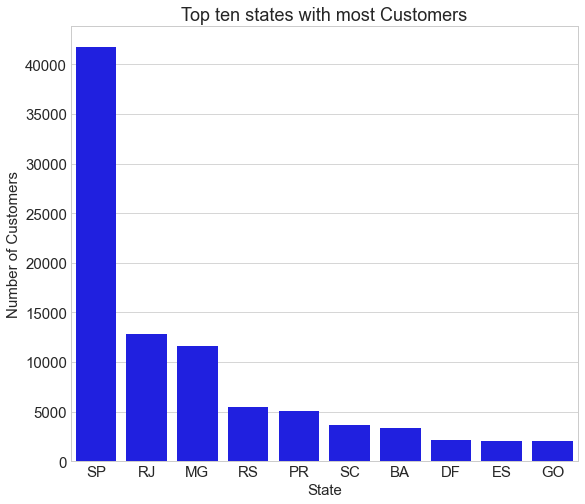

In [19]:
plt.figure(figsize = (20,8))
plt.subplot(121)
sns.barplot(data = result4_10, x = 'customer_state', y = 'nb_customer', color = "blue")
plt.title('Top ten states with most Customers')
plt.xlabel('State')
plt.ylabel('Number of Customers')

In [20]:
query5_10 = (
    """SELECT orders.customer_id, COUNT(items.order_id) as nb_orders 
    FROM orders
    INNER JOIN items ON orders.order_id = items.order_id 
    GROUP BY customer_id
    HAVING  nb_orders > 1"""
    )

In [21]:
result5_10 = pd.read_sql(query5_10 , connection)
result5_10

,customer_id,nb_orders
0,00066ccbe787a588c52bd5ff404590e3,4
1,000bf8121c3412d3057d32371c5d3395,2
2,001450ebb4a77efb3d68be5f7887cb1e,2
3,002f90a6eb386bc43bc9ba200db31a89,2
4,0031abfb953b66e998f67b09e7b11375,2
...,...,...
9798,ffe7ffb7c7ae0d42808f387578426b3b,2
9799,ffed5d4f6245fe13cd57054621eec36a,2
9800,fff168ca1f8a1d2e8e2108b231a68a8c,3
9801,fff93c1da78dafaaa304ff032abc6205,3


## **Sales:**

### 1. What is the average basket by product category?

In [22]:
query6_10 = (
    """SELECT  products.product_category_name, ROUND(AVG(items.price + items.freight_value), 2) AS avg_basket
    FROM items 
    INNER JOIN products ON items.product_id = products.product_id
    GROUP BY products.product_category_name
    ORDER BY avg_basket DESC LIMIT 10"""
    )

In [23]:
result6_10 = pd.read_sql(query6_10 , connection)
result6_10

,product_category_name,avg_basket
0,computers,1146.80
1,small_appliances_home_oven_and_coffee,660.44
2,home_appliances_2,520.66
3,agro_industry_and_commerce,369.69
4,musical_instruments,309.03
5,small_appliances,304.37
6,fixed_telephony,243.26
7,construction_tools_safety,229.19
8,furniture_bedroom,226.25
9,watches_gifts,217.92


### 2. What are the most popular products?

In [24]:
query7_10 = (
    """SELECT product_category_name, COUNT(product_category_name) AS most_product
FROM products
GROUP BY product_category_name
ORDER BY most_product DESC """
    )

In [25]:
result7_10 = pd.read_sql(query7_10 , connection)
result7_10

,product_category_name,most_product
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
...,...,...
67,home_comfort_2,5
68,fashion_childrens_clothes,5
69,security_and_services,2
70,cds_dvds_musicals,1
